In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# ROC and PR for Unbalanced Datasets

Practice problems from Bill@Deloitte.

Tasks:
0. Set up an unbalanced dataset
1. Plot an ROC Curve
2. Plot precision as a function of TPR (aka PR curve)
3. Given priors, find operating point.
4. Confirm that PR depends on tested priors, but ROC does not

## 1. Set up an unbalanced dataset

In [2]:
# method to create the unbalanced dataset
def make_unbalanced_blobs(pos_prob):
    from sklearn.datasets import make_blobs

    X, y = make_blobs(n_samples=20000, cluster_std=5, centers=2, random_state=123)

    temp = []
    for i in range(len(X)):
        if y[i]==0 and np.random.uniform()>pos_prob:
            temp.append([X[i][0], X[i][1], y[i]])
        elif y[i]==1 and np.random.uniform()<=pos_prob:
            temp.append([X[i][0], X[i][1], y[i]])

    X = np.array([[t[0], t[1]] for t in temp])
    y = np.array([t[2] for t in temp])
    return X, y

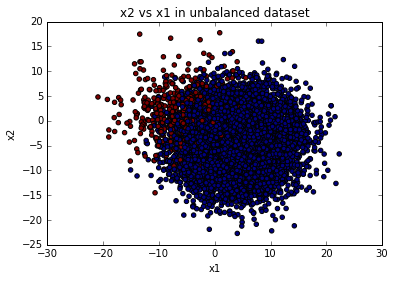

In [3]:
# generate an unbalanced dataset
X, y = make_unbalanced_blobs(0.05)

# view a sample dataset
x1 = [i[0] for i in X]
x2 = [i[1] for i in X]

plt.scatter(x1, x2, c=y)
plt.title("x2 vs x1 in unbalanced dataset")
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

There is a little bit of overlap in our dummy data, which will give the classifier a little trouble. This is good, or else we will have a perfect classifier and thus a very boring ROC curve.

We will now split our dataset into training and testing sets.

In [4]:
# split train and test datasets
test_size = 7500
X_train = X[:test_size]
y_train = y[:test_size]
X_test = X[test_size:]
y_test = y[test_size:]

With the data split we now train the model on the training subset.

In [5]:
# import classifier and build model on first 7500 samples
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Now that we have build the model on the training set, let's see what at what probability the model predicts for each of the test set records.

In [6]:
# predict class for last 2500 samples
y_pred_proba = classifier.predict_proba(X_test)

Below are the probabilities for the first 5 test set records. In each element the first number is the probability that y==0 and the second is probability that y==1. Notice each element adds to 1.

In [7]:
print y_pred_proba[:5]

[[  9.99571786e-01   4.28214318e-04]
 [  8.64346077e-01   1.35653923e-01]
 [  9.99491117e-01   5.08882546e-04]
 [  9.99955700e-01   4.42998647e-05]
 [  9.61928147e-01   3.80718533e-02]]


Let's move on to the exercises.

## 2. Plot an ROC Curve

An ROC curve is the plot of the FPR vs TPR of a classifier as the discrimation threshold is increased for 0% to 100%.

To plot an ROC curve we first have to obtain results from a classification problem. For this practice set we will generate some dummy data then classify using a logistic regression.

In [8]:
# function to calculate build ROC curve
def plot_ROC(y_pred_proba, y_actual, steps=100):
    # convert y_actual
    y_actual = np.array(y_actual)
    # instantiate fpr and tpr arrays
    fpr = []
    tpr = []
    # step through descrimation threshold from 0-1 by step_size
    for thresh in np.linspace(0, 1, num=steps, endpoint=False):
        # assign True if probability >= threshold, else False
        y_pred = np.array([proba>=thresh for proba in y_pred_proba])
        # calculate tp, fp, fn, and tn counts
        tp = ((y_pred==True) & (y_actual==True)).sum()
        fp = ((y_pred==True) & (y_actual==False)).sum()
        fn = ((y_pred==False) & (y_actual==True)).sum()
        tn = ((y_pred==False) & (y_actual==False)).sum()
        # calculate and append tpr and fpr
        tpr.append(float(tp)/(tp+fn))
        fpr.append(float(fp)/(fp+tn))
        #print "{:.2}\t{:.2}\t{:.2}".format(thresh, tpr[-1], fpr[-1])
    # plot ROC curve
    plt.plot(fpr, tpr, 'b-')
    plt.title("ROC Curve")
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()

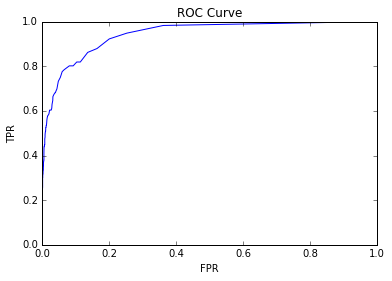

In [9]:
y1_pred_proba = [p[1] for p in y_pred_proba]
y1_test = [True if y==1 else False for y in y_test]

plot_ROC(y1_pred_proba, y1_test)

## 2. Plot Precision as a function of TPR (aka PR curve)

In [10]:
# function to calculate build prec vs tpr curve (aka PR curve)
def plot_PR(y_pred_proba, y_actual, steps=100):
    # convert y_actual
    y_actual = np.array(y_actual)
    # instantiate precision and recall arrays
    prec = []
    rec = []
    # step through descrimation threshold from 0-1 by step_size
    for thresh in np.linspace(0, 1, num=steps, endpoint=False):
        # assign True if probability >= threshold, else False
        y_pred = np.array([proba>=thresh for proba in y_pred_proba])
        # calculate tp, fp, fn, and tn counts
        tp = ((y_pred==True) & (y_actual==True)).sum()
        fp = ((y_pred==True) & (y_actual==False)).sum()
        fn = ((y_pred==False) & (y_actual==True)).sum()
        tn = ((y_pred==False) & (y_actual==False)).sum()
        # calculate and append tpr and fpr
        prec.append(float(tp)/(tp+fp))
        rec.append(float(tp)/(tp+fn))
        #print "{:.2}\t{:.2}\t{:.2}".format(thresh, prec[-1], rec[-1])
    # plot ROC curve
    plt.plot(rec, prec, 'b-')
    plt.title("PR Curve")
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()

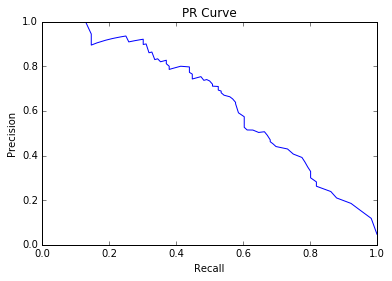

In [11]:
y1_pred_proba = [p[1] for p in y_pred_proba]
y1_test = [True if y==1 else False for y in y_test]

plot_PR(y1_pred_proba, y1_test)

# 3. Given priors, find operating point of a classifier

If we knew the prior probabilities of a true event, how would this influence the operating point (aka discrimination threshold) of our classifier?

Let's run through a common example: we want our classifier to catch a some disease but this disease occurs in 1% of the population we're looking at.

We can generate an example dataset given this information:

Prior = (actual true)/(dataset) = (TP+FN)/(TP+FP+FN+TN)